In [136]:
from quchem.Hamiltonian_PySCF import *
from quchem.Graph import *
### HAMILTONIAN start
Molecule = 'H2'
geometry = None # [('H', (0., 0., 0.)), ('H', (0., 0., 0.74))]
# basis = 'cc-pvtz'
basis = 'STO-3G'


### Get Hamiltonian
Hamilt = Hamiltonian(Molecule,
                     run_scf=1, run_mp2=1, run_cisd=1, run_ccsd=1, run_fci=1,
                     basis=basis,
                     multiplicity=1,
                     geometry=geometry)  # normally None!

QubitHamiltonian = Hamilt.Get_Qubit_Hamiltonian(threshold=None, transformation='BK')

# # if basis = 'cc-pvtz' 
# Hamilt.Run_PySCF()
Hamilt.molecule.n_qubits

4

In [137]:
QubitHamiltonian

(-0.32760818967480887+0j) [] +
(0.049197645871367594+0j) [X0 Z1 X2] +
(0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [Y0 Z1 Y2] +
(0.049197645871367594+0j) [Y0 Z1 Y2 Z3] +
(0.13716572937099492+0j) [Z0] +
(0.13716572937099492+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z0 Z2] +
(0.10622904490856086+0j) [Z0 Z2 Z3] +
(0.15660062488237958+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.16326768673564357+0j) [Z1 Z3] +
(-0.1303629205710914+0j) [Z2]

In [78]:
F_Ham = Hamilt.Get_Fermionic_Hamiltonian()

In [79]:
from openfermion.transforms import bravyi_kitaev
Hello = bravyi_kitaev(F_Ham)
Hello

(-0.32760818967480887+0j) [] +
(0.049197645871367594+0j) [X0 Z1 X2] +
(0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [Y0 Z1 Y2] +
(0.049197645871367594+0j) [Y0 Z1 Y2 Z3] +
(0.13716572937099492+0j) [Z0] +
(0.13716572937099492+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z0 Z2] +
(0.10622904490856086+0j) [Z0 Z2 Z3] +
(0.15660062488237958+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.16326768673564357+0j) [Z1 Z3] +
(-0.1303629205710914+0j) [Z2]

In [80]:
Hamilt.Get_CCSD_Amplitudes()

In [81]:
F_Ham

0.52917721092 [] +
-1.1108441798837276 [0^ 0] +
0.31320124976475916 [0^ 0^ 0 0] +
0.09839529174273517 [0^ 0^ 2 2] +
0.31320124976475916 [0^ 1^ 1 0] +
0.09839529174273517 [0^ 1^ 3 2] +
0.09839529174273517 [0^ 2^ 0 2] +
0.31085338155985687 [0^ 2^ 2 0] +
0.09839529174273517 [0^ 3^ 1 2] +
0.31085338155985687 [0^ 3^ 3 0] +
0.31320124976475916 [1^ 0^ 0 1] +
0.09839529174273517 [1^ 0^ 2 3] +
-1.1108441798837276 [1^ 1] +
0.31320124976475916 [1^ 1^ 1 1] +
0.09839529174273517 [1^ 1^ 3 3] +
0.09839529174273517 [1^ 2^ 0 3] +
0.31085338155985687 [1^ 2^ 2 1] +
0.09839529174273517 [1^ 3^ 1 3] +
0.31085338155985687 [1^ 3^ 3 1] +
0.3108533815598569 [2^ 0^ 0 2] +
0.09839529174273517 [2^ 0^ 2 0] +
0.3108533815598569 [2^ 1^ 1 2] +
0.09839529174273517 [2^ 1^ 3 0] +
-0.589121003706083 [2^ 2] +
0.09839529174273517 [2^ 2^ 0 0] +
0.32653537347128714 [2^ 2^ 2 2] +
0.09839529174273517 [2^ 3^ 1 0] +
0.32653537347128714 [2^ 3^ 3 2] +
0.3108533815598569 [3^ 0^ 0 3] +
0.09839529174273517 [3^ 0^ 2 1] +
0.310853381559

In [82]:
def Convert_fermion_Operator(HAMILTONIAN, n_orbitals):
    from openfermion.ops._fermion_operator import  FermionOperator
    
    odd_adding_term = int(n_orbitals/ 2)
    
    new_Ham = FermionOperator()    
    for term in HAMILTONIAN:
        for Op, const in term.terms.items():

            if Op == ():
                new_Ham += term
            else:
                indices, creat_ann_indices = zip(*Op)

                new_indices=[]
                for i in indices:
                    if i%2:
                        new_index = int((i-1)/2 + odd_adding_term)
                    else:
                        new_index = int(i/2)
                    new_indices.append(new_index)

                new_Op = (FermionOperator(list(zip(new_indices, creat_ann_indices)), const))
                new_Ham += new_Op
    return new_Ham

In [ ]:
F_Ham

In [124]:
F_Ham

0.52917721092 [] +
-1.1108441798837276 [0^ 0] +
0.31320124976475916 [0^ 0^ 0 0] +
0.09839529174273517 [0^ 0^ 2 2] +
0.31320124976475916 [0^ 1^ 1 0] +
0.09839529174273517 [0^ 1^ 3 2] +
0.09839529174273517 [0^ 2^ 0 2] +
0.31085338155985687 [0^ 2^ 2 0] +
0.09839529174273517 [0^ 3^ 1 2] +
0.31085338155985687 [0^ 3^ 3 0] +
0.31320124976475916 [1^ 0^ 0 1] +
0.09839529174273517 [1^ 0^ 2 3] +
-1.1108441798837276 [1^ 1] +
0.31320124976475916 [1^ 1^ 1 1] +
0.09839529174273517 [1^ 1^ 3 3] +
0.09839529174273517 [1^ 2^ 0 3] +
0.31085338155985687 [1^ 2^ 2 1] +
0.09839529174273517 [1^ 3^ 1 3] +
0.31085338155985687 [1^ 3^ 3 1] +
0.3108533815598569 [2^ 0^ 0 2] +
0.09839529174273517 [2^ 0^ 2 0] +
0.3108533815598569 [2^ 1^ 1 2] +
0.09839529174273517 [2^ 1^ 3 0] +
-0.589121003706083 [2^ 2] +
0.09839529174273517 [2^ 2^ 0 0] +
0.32653537347128714 [2^ 2^ 2 2] +
0.09839529174273517 [2^ 3^ 1 0] +
0.32653537347128714 [2^ 3^ 3 2] +
0.3108533815598569 [3^ 0^ 0 3] +
0.09839529174273517 [3^ 0^ 2 1] +
0.310853381559

In [125]:
Convert_fermion_Operator(F_Ham, Hamilt.molecule.n_qubits)

0.52917721092 [] +
-1.1108441798837276 [0^ 0] +
0.31320124976475916 [0^ 0^ 0 0] +
0.09839529174273517 [0^ 0^ 1 1] +
0.09839529174273517 [0^ 1^ 0 1] +
0.31085338155985687 [0^ 1^ 1 0] +
0.31320124976475916 [0^ 2^ 2 0] +
0.09839529174273517 [0^ 2^ 3 1] +
0.09839529174273517 [0^ 3^ 2 1] +
0.31085338155985687 [0^ 3^ 3 0] +
0.3108533815598569 [1^ 0^ 0 1] +
0.09839529174273517 [1^ 0^ 1 0] +
-0.589121003706083 [1^ 1] +
0.09839529174273517 [1^ 1^ 0 0] +
0.32653537347128714 [1^ 1^ 1 1] +
0.3108533815598569 [1^ 2^ 2 1] +
0.09839529174273517 [1^ 2^ 3 0] +
0.09839529174273517 [1^ 3^ 2 0] +
0.32653537347128714 [1^ 3^ 3 1] +
0.31320124976475916 [2^ 0^ 0 2] +
0.09839529174273517 [2^ 0^ 1 3] +
0.09839529174273517 [2^ 1^ 0 3] +
0.31085338155985687 [2^ 1^ 1 2] +
-1.1108441798837276 [2^ 2] +
0.31320124976475916 [2^ 2^ 2 2] +
0.09839529174273517 [2^ 2^ 3 3] +
0.09839529174273517 [2^ 3^ 2 3] +
0.31085338155985687 [2^ 3^ 3 2] +
0.3108533815598569 [3^ 0^ 0 3] +
0.09839529174273517 [3^ 0^ 1 2] +
0.098395291742

In [126]:
from openfermion.transforms import bravyi_kitaev
bravyi_kitaev(Convert_fermion_Operator(F_Ham, Hamilt.molecule.n_qubits))

(-0.32760818967480887+0j) [] +
(-0.049197645871367594+0j) [X0 Z1 X2] +
(-0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [X0 X2] +
(0.049197645871367594+0j) [X0 X2 Z3] +
(0.13716572937099492+0j) [Z0] +
(-0.1303629205710914+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.15660062488237958+0j) [Z0 Z2] +
(0.16326768673564357+0j) [Z0 Z2 Z3] +
(0.10622904490856086+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z1 Z3] +
(0.13716572937099492+0j) [Z2]

In [92]:
bravyi_kitaev(F_Ham)

(-0.32760818967480887+0j) [] +
(0.049197645871367594+0j) [X0 Z1 X2] +
(0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [Y0 Z1 Y2] +
(0.049197645871367594+0j) [Y0 Z1 Y2 Z3] +
(0.13716572937099492+0j) [Z0] +
(0.13716572937099492+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z0 Z2] +
(0.10622904490856086+0j) [Z0 Z2 Z3] +
(0.15660062488237958+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.16326768673564357+0j) [Z1 Z3] +
(-0.1303629205710914+0j) [Z2]

In [127]:
print('tree method')
from openfermion.transforms import bravyi_kitaev_tree
bravyi_kitaev_tree(Convert_fermion_Operator(F_Ham, Hamilt.molecule.n_qubits))

tree method


(-0.32760818967480887+0j) [] +
(-0.049197645871367594+0j) [X0 Z1 X2] +
(-0.049197645871367594+0j) [X0 Z1 X2 Z3] +
(0.049197645871367594+0j) [X0 X2] +
(0.049197645871367594+0j) [X0 X2 Z3] +
(0.13716572937099492+0j) [Z0] +
(-0.1303629205710914+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.15660062488237958+0j) [Z0 Z2] +
(0.16326768673564357+0j) [Z0 Z2 Z3] +
(0.10622904490856086+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z1 Z3] +
(0.13716572937099492+0j) [Z2]

In [128]:
from openfermion.ops import QubitOperator
HAM = bravyi_kitaev(Convert_fermion_Operator(F_Ham, Hamilt.molecule.n_qubits))

n_orbitals = 4

new_Hamiltonian = QubitOperator()

for Op in HAM:
    for PauliWord, const in Op.terms.items():
        if PauliWord == ():
            new_Hamiltonian += Op
        else:
            QubitNo_list, PauliStr_list = zip(*PauliWord)
            QubitNo_list=list(QubitNo_list)
            PauliStr_list=list(PauliStr_list)
            
            # max_even_qubit = max(i for i in QubitNo_list if not i % 2)
            if (n_orbitals/2 -1) in QubitNo_list:
                del_index= QubitNo_list.index((n_orbitals/2 -1))
                QubitNo_list.pop(del_index)
                PauliStr_list.pop(del_index)
                
#                 print(Op, '-->', tuple(zip(QubitNo_list, PauliStr_list)))
                
                const = const * -1
            
            if (n_orbitals -1) in QubitNo_list:
                del_index= QubitNo_list.index((n_orbitals -1))
                QubitNo_list.pop(del_index)
                PauliStr_list.pop(del_index)
                
                print(Op, '-->', tuple(zip(QubitNo_list, PauliStr_list)))
                

            pauli_list = tuple(zip(QubitNo_list, PauliStr_list))
            new_QubitOp = QubitOperator(pauli_list, const)
            new_Hamiltonian += new_QubitOp
new_Hamiltonian

(-0.13036292057109136+0j) [Z1 Z2 Z3] --> ((2, 'Z'),)
(0.049197645871367594+0j) [X0 X2 Z3] --> ((0, 'X'), (2, 'X'))
(-0.049197645871367594+0j) [X0 Z1 X2 Z3] --> ((0, 'X'), (2, 'X'))
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] --> ((0, 'Z'), (2, 'Z'))
(0.10622904490856086+0j) [Z1 Z3] --> ()
(0.16326768673564357+0j) [Z0 Z2 Z3] --> ((0, 'Z'), (2, 'Z'))


(-0.5400662794919306+0j) [] +
(0.19679058348547038+0j) [X0 X2] +
(0.2675286499420863+0j) [Z0] +
(0.009014930058166282+0j) [Z0 Z2] +
(0.26752864994208625+0j) [Z2]

In [96]:
from openfermion.ops import QubitOperator
HAM = bravyi_kitaev(F_Ham)

n_orbitals = 4

new_Hamiltonian = QubitOperator()

for Op in HAM:
    for PauliWord, const in Op.terms.items():
        if PauliWord == ():
            new_Hamiltonian += Op
        else:
            QubitNo_list, PauliStr_list = zip(*PauliWord)

            # max_even_qubit = max(i for i in QubitNo_list if not i % 2)
            max_even_qubit = int(n_orbitals / 2)

            pauli_list = []
            for index, qubitNo in enumerate(QubitNo_list):
                if qubitNo % 2:
                    new_qubitNo = int(max_even_qubit + (qubitNo / 2))
                else:
                    new_qubitNo = int(qubitNo / 2)
                pauli_list.append('{}{}'.format(PauliStr_list[index], new_qubitNo))

            new_QubitOp = QubitOperator(' '.join(pauli_list), const)
            new_Hamiltonian += new_QubitOp
new_Hamiltonian

(-0.32760818967480887+0j) [] +
(0.049197645871367594+0j) [X0 X1] +
(-0.049197645871367594+0j) [X0 X1 Z2] +
(-0.049197645871367594+0j) [X0 X1 Z2 Z3] +
(0.049197645871367594+0j) [X0 X1 Z3] +
(0.13716572937099492+0j) [Z0] +
(0.15660062488237958+0j) [Z0 Z1] +
(0.15542669077992843+0j) [Z0 Z1 Z2] +
(0.15542669077992843+0j) [Z0 Z1 Z2 Z3] +
(0.16326768673564357+0j) [Z0 Z1 Z3] +
(-0.1303629205710914+0j) [Z0 Z2] +
(0.13716572937099492+0j) [Z1] +
(-0.13036292057109136+0j) [Z1 Z2 Z3] +
(0.10622904490856086+0j) [Z2] +
(0.10622904490856086+0j) [Z2 Z3]

In [129]:
from quchem.Simulating_Quantum_Circuit import *
from quchem.Ansatz_Generator_Functions import *
from openfermion.ops import QubitOperator

def H2_ansatz_BK(theta):
    
    HF_circ = [cirq.X.on(cirq.LineQubit(0))]
    full_exp_circ_obj = full_exponentiated_PauliWord_circuit(QubitOperator('Y0 X1', -1j), theta)
        
    UCCSD_circ = cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
    full_circuit = cirq.Circuit([*HF_circ, *UCCSD_circ.all_operations()])
    
    return full_circuit
    
circuit_form = H2_ansatz_BK(np.pi/10)    
circuit_form

0: ───X───Rx(0.5π)───@──────────────@───Rx(-0.5π)───
                     │              │
1: ───H──────────────X───Rz(0.2π)───X───H───────────

In [133]:
from quchem.Simulating_Quantum_Circuit import *
n_shots= 10000


def VQE_experiment_ENERGY(THETA):
    ansatz_cirq_circuit = H2_ansatz_BK(THETA)
    VQE_exp = VQE_Experiment(new_Hamiltonian, ansatz_cirq_circuit, n_shots)
    return VQE_exp.Calc_Energy().real

In [134]:
import random

theta_random_input = random.uniform(0, 2*np.pi) 

0: Input_to_Funct: [3.97115212]: Output: -0.24441953043217998
1: Input_to_Funct: [3.08867387]: Output: -0.5509217299983877
2: Input_to_Funct: [3.08867387]: Output: -0.5510845771577833
3: Input_to_Funct: [3.08867387]: Output: -0.5518460077394729
4: Input_to_Funct: [3.08867387]: Output: -0.5479518784213186
5: Input_to_Funct: [3.14382876]: Output: -0.5464442157313917
6: Input_to_Funct: [3.1714062]: Output: -0.5498719522898773
7: Input_to_Funct: [3.1714062]: Output: -0.5515795414188365
8: Input_to_Funct: [3.18519493]: Output: -0.5498451895090766
9: Input_to_Funct: [3.18519493]: Output: -0.5478960427219
10: Input_to_Funct: [3.18519493]: Output: -0.5447541211166619
11: Input_to_Funct: [3.18519493]: Output: -0.546331769747195
12: Input_to_Funct: [3.18519493]: Output: -0.548759112840861
13: Input_to_Funct: [3.18519493]: Output: -0.548000766982348
14: Input_to_Funct: [3.18519493]: Output: -0.5477707877285192
15: Input_to_Funct: [3.18519493]: Output: -0.5485062473184844
16: Input_to_Funct: [3.18

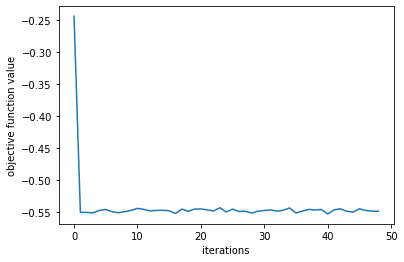

In [135]:
### optimizer
from quchem.Scipy_Optimizer import *

GG = Optimizer(VQE_experiment_ENERGY, theta_random_input, 'Nelder-Mead', store_values=True, display_iter_steps=True,
               tol=1e-5,
               display_convergence_message=True)
GG.get_env(50)
GG.plot_convergence()
plt.show()

In [48]:
n_orbitals=4
odd_adding_term = int(n_orbitals/ 2)

x = FermionOperator('1^ 3')
for Op, const in x.terms.items():
    indices, creat_ann_indices = zip(*Op)
    
    new_indices=[]
    for i in indices:
        if i%2:
            new_index = int((i-1)/2 + odd_adding_term)
        else:
            new_index = int(i/2)
        new_indices.append(new_index)
        
    new_Op = list(zip(new_indices, creat_ann_indices))
    print(FermionOperator(new_Op, const))

1.0 [2^ 3]


In [40]:
indices

(0, 3)

In [ ]:
 FermionOperator('3^ 0', 0.5)

In [33]:
indices, creat_ann_indices = zip(*Op)